# Pattern recognition - MsCV ViBOT

Guillaume Lemaitre - Fabrice Meriaudeau - Joan Massich

In [1]:

%matplotlib inline
%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# MPLD3 extension
import mpld3

# Numpy library
import numpy as np


Pretty printing has been turned OFF


## Ensemble classifiers

In this notebook, you will learn how to program two ensemble classifiers: (i) AdaBoost and (ii) Random Forest. Ensemble learners combine several low performance classifiers, either due to their capabilities of over-fitting the training data or their individual low accuracy rate. However, this combination leads to a strong classifier with higher accuracy rates and able to generalize the decision taken.

### The AdaBoost Quest

In order to implement AdaBoost, you will go step by step:

* First, you will work on the information gain maximisation allowing to find the best split in a feature dimension,
* Then, you will implement a simple decision stump classifier based on information gain maximisation,
* Finally, you will implement AdaBoost classifier using the decision stump classifier as weak learner.

#### Information Gain principle

To understand the principle of information gain, the following data will be generated:

* The dataset is a 1-D binary dataset with,
* Class #1 following a normal distribution $\mathcal{N}(0.7,0.3)$ composed of 500 points,
* Class #2 following a normal distribution $\mathcal{N}(0.5,0.3)$ composed of 500 points.

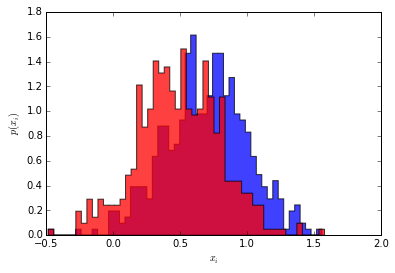

In [2]:

# Generate data
mean1, mean2 = .7, .5
std1, std2 = .3, .3
# Define the number of samples
n_samples = 500

# Generate the data
class_1 = np.random.normal(mean1, std1, n_samples)
class_2 = np.random.normal(mean2, std2, n_samples)

# Concatenate the data
data = np.ravel(np.concatenate((class_1, class_2), axis=0))
label = np.ravel(np.concatenate((np.ones((n_samples, 1)), -1 * np.ones((n_samples, 1))), axis=0))

# Plot the different class
nb_bins = 50

plt.figure()
# Plot the distribution of class #1
n, bins, patches = plt.hist(class_1, nb_bins, normed=1, histtype='stepfilled')
plt.setp(patches, 'facecolor', 'b', 'alpha', 0.75)
# Plot the distribution of class #2
n, bins, patches = plt.hist(class_2, nb_bins, normed=1, histtype='stepfilled')
plt.setp(patches, 'facecolor', 'r', 'alpha', 0.75)
plt.xlabel(r'$x_i$')
plt.ylabel(r'$p(x_i)$')
plt.show()


From the above measure, we can see

(a) We will define first the entropy function that is used several time in the computation of the information gain. The entropy can be computed such as:

* For $p(x) > 0$, the entropy can be calculated as $H(X) = - p(x) \log_2 p(x)$,
* For $p(x) = 0$, the entropy can be calculated as $H(X) = 0$.

In [6]:

# Define the entropy function
def Entropy(p):
    ent = -p * log2(p)
    return ent


In [4]:
# Define the function to get the probability for a binary case
def FindProbability(y):
    return 
    

(b) Now, you will need to find the best threshold $x_i \in X$ which maximize the information gain. Thus, we will make a greedy search in which we will try all the possible values $x_i$ and pick up the one maximimising the information gain. To do so, you will need to:

* Sort the vector x (data) and accordingly the vector y (label),
* Compute the parent probabilities $p_{total}$ for class #1 and class #2 => use the function FindProbability()
* Then, try each threshold $t_i$ corresponding to each value of the sorted vector $x_i$,
* Split the sorted label into two children group and compute their respective probabilities $p_{left}$ and $p_{right}$,
* Define in which sense the inequality has to be performed,
* Compute the entropies corresponding to the probabilities $p_{total}$, $p_{left}$ and $p_{right}$,
* Compute the information gain such as $I = H(p_{total}) - (H(p_{left}) + H(p_{right}))$,
* Select the threshold for which the information gain is maximum,
* Return the threshold found, the sign of the inequality and the information gain for this case.

In [ ]:

# Define a function to find the best split in a single feature dimension
def FindBestSplit(x, y, verbose=True):
    
    # Sort x
    idx_sorted = ...
    x_sorted = ...
    y_sorted = ...
    
    # For each value of y_sorted compute the information gain
    # Compute the total entropy
    p_total = FindProbability(...)
    
    # Pre-allocation
    inf_gain = ...
    sign_thr = ...
    
    for t in range(1, np.size(y_sorted) - 1):
        # Extract the useful information
        y_left = ...
        y_right = ...
        
        # Find the entropy at the left of the threshold
        p_left = FindProbability(...)
        # Find the entropy at the right of the threshold
        p_right = FindProbability(...)
        
        # Decide in which sense the sign should be
        if (p_left[0] > p_left[1]):
            sign_thr[t] = ...
        else:
            sign_thr[t] = ...
        
        # Compute the children entropies
        ent_left = Entropy(...)
        ent_right = Entropy(...)
        
        # Compute the information gain
        norm_factor_left = ...
        norm_factor_right = ...
        inf_gain[t] = ...
 
    if verbose:
        plt.figure()
        plt.plot(x_sorted, inf_gain)
        plt.plot((x_sorted[np.argmax(inf_gain)], x_sorted[np.argmax(inf_gain)]), (.0, np.max(inf_gain)), 'r')
        plt.ylabel('Information Gain')
        plt.xlabel('Threshold')
        plt.show()
                                     
    # Find the maximum of the information gain
    return (x_sorted[np.argmax(inf_gain)], sign_thr[np.argmax(inf_gain)], np.max(inf_gain))


(c) Apply the previous function on the previous generated data.

In [ ]:

print ...


#### Decision Stump classifier

A decision stump classifier is a classifier which will try to find the features dimension in which the information gain will be maximum. Thus, the decision stump is equivalent to find the best split for each features dimensions and finally select the one which maximize the information gain.

Now, we will consider a more challenging dataset:

* The dataset is a 2-D dataset,
* Class #1 follows a Normal distribution with:

$$\mu_1 = \left[ 0, 0 \right]$$

$$\Sigma_1 = \left[ \begin{matrix} 1.5 && 0 \\ 0 && 1.5 \end{matrix} \right]$$

* Class #2 follows a Normal distribution with:

$$\mu_2 = \left[ 3, 3 \right]$$

$$\Sigma_2 = \left[ \begin{matrix} 2 && 0 \\ 0 && 2 \end{matrix} \right]$$

In [3]:

# Generate data
mean1, mean2 = np.array([0., 0.]), np.array([3., 3.])
cov1, cov2 = np.diagflat(np.array([1.5, 1.5])), np.diagflat(np.array([2., 2.]))
# Define the number of samples
n_samples = 500

# Generate the data
class_1 = np.random.multivariate_normal(mean1, cov1, n_samples)
class_2 = np.random.multivariate_normal(mean2, cov2, n_samples)

# Concatenate the data
data = np.concatenate((class_1, class_2), axis=0)
label = np.ravel(np.concatenate((np.ones((n_samples, 1)), -1 * np.ones((n_samples, 1))), axis=0))

# Plot the data into a scatter plot
fig = plt.figure()
plt.plot(np.ravel(class_1[:, 0]), np.ravel(class_1[:, 1]), 'ro', label='Class #1')
plt.plot(np.ravel(class_2[:, 0]), np.ravel(class_2[:, 1]), 'b^', label='Class #2')
plt.legend()
mpld3.display(fig)


We define the following class `DecisionStumpClassifier` which will be composed of three variables:

* `dimension`: corresponding to the feature dimension where the best split was found,
* `threshold`: corresponding to the best threshold in that given dimension,
* `sign`: corresponding to the sign of the inequality to decide the class labelling.

In [4]:

# Define a class that have all the attributes of a decision stump classifier
class DecisionStumpClassifier(object):
    def __init__(self, threshold, dimension, sign):
        self.dimension = dimension
        self.threshold = threshold
        self.sign = sign
        

We will define from now a function in which given the data $X$ and the decision stump classifier $h$, a labelling (prediction) vector will be returned.

In [5]:

# Define a function to predict the output of a decision stump
def PreditDecisionStump(X, stump):
    # Get the prediction
    # Check in which sense the comparison has to be done
    if stump.sign == 1.:
        pred = ((X[:, stump.dimension] > stump.threshold).astype(float) * 2. - 1)
    else:
        pred = ((X[:, stump.dimension] < stump.threshold).astype(float) * 2. - 1)
        
    return pred
    

(a) Your task will be to implement the build of decision stump classifier. To do so, you will need to:

* Go through all the different features dimensions one by one,
* Find the best split using FindBestSplit function previously implemented,
* Find the dimension in which the information gain is maximal,
* Create an object `DecisionStumpClassifier` calling the constructor with `threshold`, `dimension`, `sign` as input argument,
* Return the object created.

In [ ]:

# Function to build a decision stump
def BuildDecisionStump(X, y):
    
    thr_stump = ...
    info_gain_stump = ...
    sgn_stump = ...
    
    # For each feature dimension, find the best split
    for d in range(0, np.shape(X)[1]):
        # Find the best split in that dimension
        thr_stump[d], sgn_stump[d], info_gain_stump[d] = ...
    
    # Find the max information gain
    idx_d = ...
    
    # Create the decision stump classifier
    final_classifier = ...
    
    # Return a decision stump classifier object
    return final_classifier


(b) Build a decision stump classifier for the data previously generated.

In [ ]:

# Compute the decision stump classifier for the data generated
one_stump = ...


(c) Plot the decision boundary for the obtained descision stump classifier.

In [ ]:

# Plot the data into a scatter plot
...


#### AdaBoost

AdaBoost is an ensemble learning method in which a linear combination of weak learners will be used to get a prediction. It is characterized by the choice of a set of several weak learners $h_t$ (i.e., the decision stump in our case) with their corresponding learning rates $\alpha_t$.

In [6]:

# Class of ensemble learning as in adaboost
class AdaBoostClassifier(object):
    def __init__(self, alpha, wk_learner):
        self.alpha = alpha
        self.wk_learner = wk_learner
        

We will define from now a function in which given the data $X$ and the ensemble of weak learner $H$, a labelling (prediction) vector will be returned.

In [7]:

# Define a function to classify data using an ensemble
def PredictAdaBoost(X, ens):
    
    pred = np.ravel(np.zeros((np.shape(X)[0], 1)))
    # For each weak learner
    for e in range(0, np.size(ens)):
        # Check in which sense the comparison has to be done
        if ens[e].wk_learner.sign == 1.:
            # Add the impact of the current weak learner
            pred += ens[e].alpha * ((X[:, ens[e].wk_learner.dimension] > ens[e].wk_learner.threshold).astype(float) * 2. - 1)
        else:
            # Add the impact of the current weak learner
            pred += ens[e].alpha * ((X[:, ens[e].wk_learner.dimension] < ens[e].wk_learner.threshold).astype(float) * 2. - 1)
                
    return pred
    

(a) Now, you will have to implement AdaBoost in order to create an ensemble of decision stump classifiers. To do so you will have to:

* Initialise a label distribution in which each label will be equally weighted,
* Incrementaly collect a number of weak learners,
* Find the best decision stump for the data and the weighted distribution,
* Compute the prediction using the decision stump obtained,
* Compute the error rate $\epsilon$ of the decision stump,
* Compute the learning rate $\alpha$ such as $\alpha = \frac{1}{2} \log \frac{1 - \epsilon}{\epsilon}$,
* Append a new object `AdaBoostClassifier` by calling the constructor with the corresponding $\alpha$ and decision stump classifier,
* Update the distribution $D$ such as $D_t = D_{t-1} \exp(- y \alpha_t h_t )$,
* Normalise the distribution $D_t$.

In [ ]:

# Let's go for adaboost
def BuildAdaBoost(X, y, nb_wk_learner):

    ensemble = []
    
    # Define the number of learner
    k_learner = 0
    # Define the weights distribution
    D = ...
    while k_learner < nb_wk_learner:
        
        # Find the best weak-learner
        best_wk_ln = ...
        
        # Get the prediction
        pred = ...
        
        # Compute the error
        err = ...
        err = ...
        
        # Compute alpha_t
        alpha_t = ...
        
        # Add to the ensemble
        ensemble.append(...)        
        
        # Reweight the distribution        
        D *=  ...
        D /= ...
        
        # Increment the iterator of classifier
        k_learner += 1
        
    return ensemble
    

(b) Build an ensemble classifier with 10 classifiers. Then, predict the decision for the same data and give the accuracy score.

In [ ]:

# Define the number of weak classifier
n_ens = 10

# Build Adaboost
ensAda = ...

# Make the prediction and provide the score
prediction = ...
print 'The accuracy rate is {}%'.format(np.sum((np.sign(prediction) == label).astype(float)) / float(np.size(label)) * 100)


We show the boundary decision for each class by testing for every possible $X$. 

In [ ]:

# Plot the data into a scatter plot
fig = plt.figure()

plot_step = 0.02

# Plot the decision boundaries
...


We give an example of how use the scikit-learn toolbox and more precisely their implementation of AdaBoost.

In [9]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the number of weak classifier
n_ens = 10

# Create and fit an AdaBoost decision tree
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=n_ens)
bdt.fit(data, label)
print 'The accuracy rate is {}%'.format(bdt.score(data, label) * 100)

# Plot the data into a scatter plot
fig = plt.figure()

plot_step = 0.02

# Plot the decision boundaries
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

plt.scatter(np.ravel(class_1[:, 0]), np.ravel(class_1[:, 1]), c = 'r')
plt.scatter(np.ravel(class_2[:, 0]), np.ravel(class_2[:, 1]), c = 'b', marker='^')

mpld3.display(fig)


The accuracy rate is 94.2%


### The quest for Random Forest

In order to implement Random Forest, you will go step by step:

* First, you will play with the implementation of scikit-learn of the decision trees classifier,
* Then, you will implement bootstrap in order to randomise the data,
* Finally, you will implement Random Forest using previous methods.

The following data will be generated:

* The dataset is a 5-D dataset,
* Class #1 follows a multivariate Normal distribution with:

$$\mu_1 = \left[ 0.5, 0.4, 0.3, 7.0, 8.0 \right]$$

$$\Sigma_1 = \left[ \begin{matrix} 1.5 && 0 && 0 && 0 && 0 \\ 0 && 1.5 && 0 && 0 && 0 \\ 0 && 0 && 2 && 0 && 0 \\ 0 && 0 && 0 && 3 && 0 \\ 0 && 0 && 0 && 0 && 1.5 \end{matrix} \right]$$

* Class #2 follows a multivariate Normal distribution with:

$$\mu_2 = \left[ 0.6, 0.3, 0.6, 6.5, 8 \right]$$

$$\Sigma_2 = \left[ \begin{matrix} 2 && 0 && 0 && 0 && 0 \\ 0 && 2 && 0 && 0 && 0 \\ 0 && 0 && 1.5 && 0 && 0 \\ 0 && 0 && 0 && 2 && 0 \\ 0 && 0 && 0 && 0 && 3 \end{matrix} \right]$$

In [10]:

# Generate data
mean1, mean2 = np.array([.5, .4, .3, 7., 8.]), np.array([.6, .3, .6, 6.5, 8.])
cov1, cov2 = np.diagflat(np.array([1.5, 1.5, 2., 3., 1.5])), np.diagflat(np.array([2., 2., 1.5, 2., 3.]))
# Define the number of samples
n_samples = 500

# Generate the data
class_1_train = np.random.multivariate_normal(mean1, cov1, n_samples)
class_2_train = np.random.multivariate_normal(mean2, cov2, n_samples)
class_1_test = np.random.multivariate_normal(mean1, cov1, n_samples)
class_2_test = np.random.multivariate_normal(mean2, cov2, n_samples)

# Concatenate the data
training_data = np.concatenate((class_1_train, class_2_train), axis=0)
training_label = np.ravel(np.concatenate((np.ones((n_samples, 1)), -1 * np.ones((n_samples, 1))), axis=0))
testing_data = np.concatenate((class_1_test, class_2_test), axis=0)
testing_label = np.ravel(np.concatenate((np.ones((n_samples, 1)), -1 * np.ones((n_samples, 1))), axis=0))


#### Decision Tree Classifier

(a) Use the scikit-learn `DecisionTreeClassifier` with the training and testing datasets generated.

In [12]:

from sklearn.tree import DecisionTreeClassifier

# Create the decision trees
normal_decision_tree = DecisionTreeClassifier()
# Fit the training data
normal_decision_tree.fit(training_data, training_label)
# Predict an get the score
print 'The accuracy of the normal decision tree is {}%'.format(normal_decision_tree.score(testing_data, testing_label)*100)


The accuracy of the normal decision tree is 56.0%


(b) Check the arguments `max_features` in the documentation and check if it is corresponding to the following statement: "when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features."

(c) Train and test a decsion tree classifier with `max_features` equal to `'sqrt'`

In [24]:

# Select only a subset of feature at each node of the tree
m = 'sqrt' # Select sqrt(#feature dimensions)
# Create the decision trees
normal_decision_tree = DecisionTreeClassifier(max_features='sqrt')
# Fit the training data
normal_decision_tree.fit(training_data, training_label)
# Predict an get the score
print 'The accuracy of the normal decision tree is {}%'.format(normal_decision_tree.score(testing_data, testing_label)*100)


The accuracy of the normal decision tree is 54.7%


#### Bootstrap Aggregating (Bootstrap)

Bagging or also known as Bootstrap aggregating corresponds to build a dataset of the same size as the original dataset by randomly drawing sample with replacement.

(a) Generate a dataset using bagging principle. To do so, you will have to:

* Generate the index of the boostrap => use the function np.random.choice(),
* Create a vector of weight which will indicate the number of times a sample is present in the bootstrap dataset,
* Return the weight vector.

In [33]:

# Define a function to generate bootstrap sample
def GenerateBootstrap(X):
    # Generate the index
    idx_bootstrap = np.random.choice(np.arange(np.shape(X)(0)))
    
    weight = [idx_bootstrap.count(i) for i in idx_bootstrap]
    weight = [a*b for a,b in zip(weight,X)]
    
    return weight


#### Random Forest

We declare a function which will provide the prediction once the ensemble created through Random Forest will be build. The prediction is performed through majority voting using the decision of each tree of the forest.

In [34]:

# Define the function to apply majority voting
def MajorityVoting(Y):
    
    # Make the sum of all the labels
    y = np.sum(Y, axis=1)
    
    return ((y >= 0).astype(float) * 2 - 1)


In [23]:
# Define a function to predict the label using random forest
def PredictRandomForest(X, forest):
    
    # Pre-allocate the label
    label = np.zeros((np.shape(X)[0], np.size(forest)))
    
    # Predict the label for each result
    for t in range(0, np.size(forest)):
        label[:, t] = forest[t].predict(X)
        
    # Apply majority voting
    return MajorityVoting(label)


[In Random Forest, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features.](http://scikit-learn.org/stable/modules/ensemble.html#random-forests)

(a) Implement Random Forest. To do so, you will need to:

* Generate a bootsrap,
* Append a new `DecisionTreeClassifier` object with the argument `max_features='auto'`,
* Train the created tree with the argument `sample_weight` equal to the weight vector created from the bootstrap,
* Return the list of decision tree classifiers.

In [35]:

# Define a function for Random Forest
def BuildRandomForest(X, y, nb_trees):
    
    forest=[]
    
    # For each tree
    for t in range(0, nb_trees):
        
        # Get a bootstrap sample of the data
        weights = GenerateBootstrap(X)
        normal_decision_tree = DecisionTreeClassifier()

        # Fit the training data
        

        # Generate a tree for this bootsrap
        forest.append(normal_decision_tree)
        
        # Train the tree
        forest[t].fit(training_data, training_label)
        
    # Return the full forest
    return forest


(b) Train and test the random forest classifier with 100 decision trees.

In [31]:

# Define the number of trees
n_trees = 100

# Train
rf = BuildRandomForest(X, y, n_trees)

# Test
prediction = PredictRandomForest(X, rf)
print 'The accuracy rate is {}%'.format(np.sum((prediction == testing_label).astype(float)) / float(np.size(testing_label)) * 100)


NameError: name 'X' is not defined

We provide an example of the implementation of Random Forest in the scikit-learn toolbox.

In [32]:

from sklearn.ensemble import RandomForestClassifier

# Define the number of trees
n_trees = 100

rf_sklearn = RandomForestClassifier(n_trees)

# Train
rf_sklearn.fit(training_data, training_label)

# Test
print 'The accuracy rate is {}%'.format(rf_sklearn.score(testing_data, testing_label) * 100)


The accuracy rate is 58.2%
